## Output variable -> y
    
    y -> Whether the client has subscribed a term deposit or not 
    Binomial ("yes" or "no")
    
    
### Attribute information For bank dataset

Input variables:
       
### bank client data:
- 1 - age (numeric)
- 2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student","blue-collar","self-employed","retired","technician","services") 
- 3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
- 4 - education (categorical: "unknown","secondary","primary","tertiary")
- 5 - default: has credit in default? (binary: "yes","no")
- 6 - balance: average yearly balance, in euros (numeric) 
- 7 - housing: has housing loan? (binary: "yes","no")
- 8 - loan: has personal loan? (binary: "yes","no")
       
### related with the last contact of the current campaign:
- 9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 
- 10 - day: last contact day of the month (numeric)
- 11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
- 12 - duration: last contact duration, in seconds (numeric)
   
   
### other attributes:
- 13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- 14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
- 15 - previous: number of contacts performed before this campaign and for this client (numeric)
- 16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

### Output variable (desired target):
- 17 - y - has the client subscribed a term deposit? (binary: "yes","no")

In [1]:
# Importing the required libraries 

import pandas as pd, numpy as np
import seaborn as sns, matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [2]:
# Removing warnings if any
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Loading the dataset
bank = pd.read_csv("bank-full.csv",delimiter=';')
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### Performing EDA on the data

In [4]:
 # to get the information of the datafile
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
# summarizing the datafile
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [6]:
# to check the null values of the data
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [7]:
print("Dimensions -",bank.shape)
print("Column names -",bank.columns)

Dimensions - (45211, 17)
Column names - Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')


## Visualisations

#### Checking the age group of the Clients who have and not subscribed for the term deposit 

<AxesSubplot:xlabel='y', ylabel='age'>

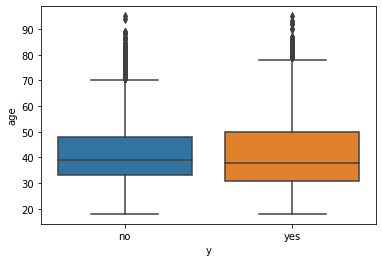

In [8]:
# plotting for clients about term deposit subscription by age
sns.boxplot(x='y',y='age',data=bank)

In [9]:
bank['age'].value_counts()

32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
93       2
90       2
95       2
88       2
94       1
Name: age, Length: 77, dtype: int64

#### Checking the balance of the Clients who have and not subscribed for term deposit

<AxesSubplot:xlabel='y', ylabel='balance'>

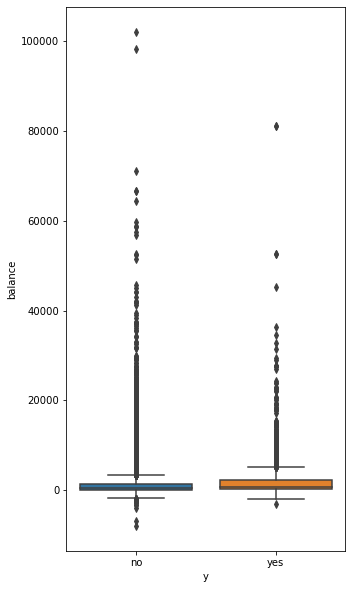

In [10]:
plt.figure(figsize=(5,10))
sns.boxplot(x='y',y='balance',data=bank)

#### Visualizing the no. of clients who have and not subscribed 

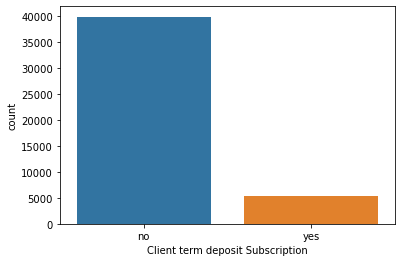

In [11]:
sns.countplot(x='y',data=bank)
plt.xlabel("Client term deposit Subscription")
plt.show()

#### Observing whether the previous marketing campaign led the clients to subscribe the term deposit or not

In [12]:
# summarising the information using crosstab
pd.crosstab(bank.y, bank.poutcome)

poutcome,failure,other,success,unknown
y,,,,
no,4283,1533,533,33573
yes,618,307,978,3386


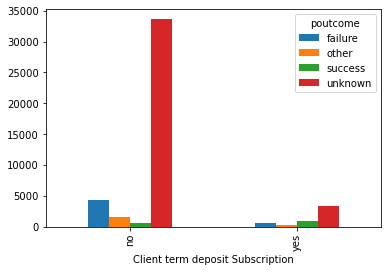

In [13]:
# visualizing the above information
pd.crosstab(bank.y, bank.poutcome).plot(kind='bar')
plt.xlabel("Client term deposit Subscription")
plt.show()

In [14]:
bank['poutcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

#### Checking how many of the clients who have personal loan, have subscribed for term deposit

In [15]:
# personal loan information 
pd.crosstab(bank.y, bank.loan)

loan,no,yes
y,,
no,33162,6760
yes,4805,484


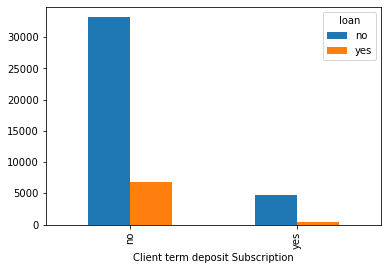

In [16]:
pd.crosstab(bank.y, bank.loan).plot(kind = 'bar')
plt.xlabel("Client term deposit Subscription")
plt.show()

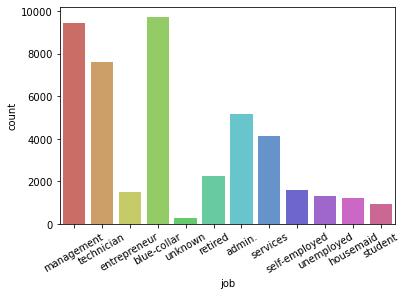

In [17]:
# Visualisation of job roles of the clients 
sns.countplot(x='job',data=bank,palette='hls')
plt.xticks(rotation=30)
plt.show()

In [18]:
# counting the total no. of clients under various job roles
bank['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

## Encoding of categorical variables 

In [19]:
# Changing the datatype of the varibles from object to category to perform label encoding
bank[['job','marital','education','default','housing','loan','contact','poutcome','month',
      'y']] = bank[['job','marital','education','default','housing','loan','contact','poutcome',
                    'month','y']].astype('category')
bank1 = bank

In [20]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  category
 2   marital    45211 non-null  category
 3   education  45211 non-null  category
 4   default    45211 non-null  category
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  category
 7   loan       45211 non-null  category
 8   contact    45211 non-null  category
 9   day        45211 non-null  int64   
 10  month      45211 non-null  category
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  category
 16  y          45211 non-null  category
dtypes: category(10), int64(7)
memory usage: 2.8 MB


In [21]:
# label Encoding using cat.codes
bank1['month'] = bank1['month'].cat.codes
bank1['job'] = bank1['job'].cat.codes
bank1['marital'] = bank1['marital'].cat.codes
bank1['education'] = bank1['education'].cat.codes
bank1['default'] = bank1['default'].cat.codes
bank1['housing'] = bank1['housing'].cat.codes
bank1['loan'] = bank1['loan'].cat.codes
bank1['contact'] = bank1['contact'].cat.codes
bank1['poutcome'] = bank1['poutcome'].cat.codes
bank1['y'] = bank1['y'].cat.codes

In [22]:
bank1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        45211 non-null  int64
 1   job        45211 non-null  int8 
 2   marital    45211 non-null  int8 
 3   education  45211 non-null  int8 
 4   default    45211 non-null  int8 
 5   balance    45211 non-null  int64
 6   housing    45211 non-null  int8 
 7   loan       45211 non-null  int8 
 8   contact    45211 non-null  int8 
 9   day        45211 non-null  int64
 10  month      45211 non-null  int8 
 11  duration   45211 non-null  int64
 12  campaign   45211 non-null  int64
 13  pdays      45211 non-null  int64
 14  previous   45211 non-null  int64
 15  poutcome   45211 non-null  int8 
 16  y          45211 non-null  int8 
dtypes: int64(7), int8(10)
memory usage: 2.8 MB


In [23]:
# checking for null values
bank1.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

## Model Building 

In [24]:
from sklearn.linear_model import LogisticRegression
bank1.shape

(45211, 17)

In [25]:
# Dividing our data into input and output variables

# Independent variables
X = bank1.drop('y',axis=1)
# Dependent variable
Y = bank1['y']

# Logistic Regression Model
classifier = LogisticRegression()
classifier.fit(X,Y)

LogisticRegression()

In [26]:
# to print all the coefficients of the independent variables
classifier.coef_

array([[-3.17050285e-02,  1.46300887e-02, -9.21490185e-02,
        -1.31741228e-02, -4.79559847e-03,  4.00722249e-05,
        -1.81671269e-01, -5.35283161e-02, -1.86813588e-01,
        -8.42778361e-03, -5.98297311e-02,  3.27200425e-03,
        -2.67118627e-01, -1.23626242e-03,  1.20031954e-01,
        -1.80631482e-01]])

# Predictions

In [27]:
# Probability values prediction
classifier.predict_proba (X)

array([[0.94850478, 0.05149522],
       [0.94882557, 0.05117443],
       [0.94692439, 0.05307561],
       ...,
       [0.67148092, 0.32851908],
       [0.9403167 , 0.0596833 ],
       [0.58130198, 0.41869802]])

In [28]:
# Prediction of the dependent variable using independent variables and printing 
y_pred = classifier.predict(X)
bank1['y_pred'] = y_pred
pred = bank1[['y','y_pred']]
pred

,y,y_pred
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,0
45207,1,0
45208,1,0
45209,0,0


In [29]:
# to print the probability values of the prediction 
y_prob = pd.DataFrame(classifier.predict_proba(X.iloc[:,:]))
new_data = pd.concat([pred,y_prob],axis=1)
new_data

,y,y_pred,0,1
0,0,0,0.948505,0.051495
1,0,0,0.948826,0.051174
2,0,0,0.946924,0.053076
3,0,0,0.960842,0.039158
4,0,0,0.903260,0.096740
...,...,...,...,...
45206,1,0,0.614975,0.385025
45207,1,0,0.920105,0.079895
45208,1,0,0.671481,0.328519
45209,0,0,0.940317,0.059683


## Testing accuracy of the model

### - Confusion Matrix

In [30]:
# Confusion matrix for accuracy testing
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y,y_pred)
confusion_matrix

array([[39279,   643],
       [ 4436,   853]], dtype=int64)

In [31]:
# confusion matirx can also be printed using crosstab function
pd.crosstab(y_pred,Y)

y,0,1
row_0,,
0,39279,4436
1,643,853


In [32]:
# to print the accuracy of the model
accuracy = sum(Y==y_pred)/bank1.shape[0]
accuracy

0.887660082723231

#### Hence, the accuracy of the logistic regression model is 89%

In [33]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     39922
           1       0.57      0.16      0.25      5289

    accuracy                           0.89     45211
   macro avg       0.73      0.57      0.60     45211
weighted avg       0.86      0.89      0.86     45211



### - ROC curve

In [34]:
from sklearn.metrics import roc_auc_score # for accuracy
from sklearn.metrics import roc_curve # for plotting curve

# accuracy of the model using roc
model_roc_score = roc_auc_score(Y,classifier.predict(X))
model_roc_score

0.5725858584572683

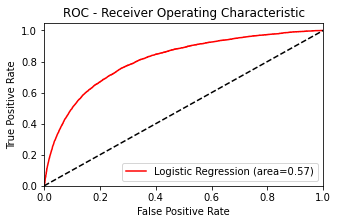

In [35]:
# plotting the roc curve
plt.figure(figsize=(5,3))
fpr,tpr,thresholds = roc_curve(Y,classifier.predict_proba(X)[:,1])
plt.plot(fpr,tpr, label='Logistic Regression (area=%0.2f)'%model_roc_score,color='red')
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

## For the identification of insignificant variables

In [36]:
# Using statsmodels library for the identification of insignificant variables 
import statsmodels.api as sm
# Using Logit() function for creating Logistic Regression Model
logit = sm.Logit(Y,X)
logit.fit().summary()

Optimization terminated successfully.
         Current function value: 0.276364
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                45211
Model:                          Logit   Df Residuals:                    45195
Method:                           MLE   Df Model:                           15
Date:                Sat, 13 May 2023   Pseudo R-squ.:                  0.2342
Time:                        10:12:48   Log-Likelihood:                -12495.
converged:                       True   LL-Null:                       -16315.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age           -0.0235      0.001    -18.322      0.000      -0.026      -0.021
job           -0.0157      0.005     -3.051      0.002      -0.026      -0.006
marital       -0.1877      0.026     -7.181      0.000      -0.239      -0.136
education      0.0308      0.022      1.389      0.165      -0.013       0.074
default       -0.4022      0.159     -2.534      0.011      -0.713      -0.091
balance     1.978e-05   4.51e-06      4.381      0.000    1.09e-05    2.86e-05
housing       -1.2719      0.037    -34.810      0.000      -1.343      -1.200
loan          -0.8290      0.056    -14.696      0.000      -0.940      -0.718
contact       -0.5961      0.027    -22.449      0.000      -0.648      -0.544
day           -0.0169      0.002     -8.524      0.000      -0.021      -0.013
month          0.0054      0.005      1.013      0.311      -0.005       0.016
duration       0.0038   6.01e-05     63.105      0.000       0.004       0.004
campaign      -0.1682      0.011    -15.928      0.000      -0.189      -0.147
pdays          0.0002      0.000      0.878      0.380      -0.000       0.001
previous       0.0548      0.008      6.879      0.000       0.039       0.070
poutcome      -0.2257      0.022    -10.244      0.000      -0.269      -0.183
==============================================================================
"""

## To identify the best threshold 

In [37]:
# false positive rate
fpr

array([0.00000000e+00, 2.50488452e-05, 1.00195381e-04, ...,
       9.97795702e-01, 9.97795702e-01, 1.00000000e+00])

In [38]:
# true positive rate
tpr

array([0.        , 0.        , 0.        , ..., 0.99981093, 1.        ,
       1.        ])

In [39]:
# creating table for accuracies according to their thresholds
from sklearn.metrics import accuracy_score
accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(classifier.predict_proba(X)[:,1]>thres,1,0)
    accuracy_ls.append(accuracy_score(Y,y_pred,normalize=True))

accuracy_ls = pd.concat([pd.Series(thresholds),pd.Series(accuracy_ls)],axis=1)
accuracy_ls.columns = ['Thresholds','Accuracy']
accuracy_ls.sort_values(by='Accuracy',ascending=False,inplace=True)
accuracy_ls

,Thresholds,Accuracy
814,4.851707e-01,0.887815
815,4.850184e-01,0.887793
812,4.855776e-01,0.887793
813,4.853018e-01,0.887793
806,4.864249e-01,0.887771
...,...,...
7832,4.616320e-04,0.122824
7833,4.589572e-04,0.122802
7834,5.642722e-05,0.118931
7835,5.440802e-05,0.118909


In [40]:
# to get the best threshold 
from numpy import argmax
a = tpr - fpr
b = argmax(a)
best_thresh = thresholds[b]
print("Best Threshold: %f" %(best_thresh))

Best Threshold: 0.118828


In [41]:
# to print accuracy using the best threshold 
threshold = 0.118807
preds = np.where(classifier.predict_proba(X)[:,1]>threshold,1,0)
roc_auc_score(Y,preds)

0.7403629813056997

### Conclusion
    There's a huge number of clients who are without subscription for the term deposit. 
    Those who have subscribed for the deposit belong to middle-age.
    There are many clients who have housing and personal loans but without the subscription of the term deposit.